In [1]:
%autosave 1

Autosaving every 1 seconds


In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('ALLDATA.csv')
df.tail()

,_ID,NAME,EMAIL,DESIGNATION,APPROVER,APPROVAL,STATUS,SKILLS,ORGANIZATION,DURATIONINWEEKS,PROJECTNAME,YEARS,SKILLSGAINED,MENTOR,CLIENT,SKILLMODE
1819,6615416bf18a366646f02171,Laura Miller,boonekurt@example.org,Technology Solution Enabler,Laura Miller,Erin Munoz,deny,React,"Summers, Rodriguez and Turner",46,Serverless Backend Development with AWS Lambda...,1,Alteryx,Cassie Erickson,Camacho-Owens,youtube
1820,6615416bf18a366646f02171,Laura Miller,boonekurt@example.org,Technology Solution Enabler,Laura Miller,Heather Dunlap,deny,Project Mgmt,"Quinn, Guzman and Thomas",8,Serverless Backend Development with AWS Lambda...,1,Alteryx,Cassie Erickson,Camacho-Owens,youtube
1821,6615416bf18a366646f02171,Laura Miller,boonekurt@example.org,Technology Solution Enabler,Laura Miller,Erin Munoz,deny,React,"Quinn, Guzman and Thomas",8,Serverless Backend Development with AWS Lambda...,1,Alteryx,Cassie Erickson,Camacho-Owens,youtube
1822,6615416bf18a366646f02171,Laura Miller,boonekurt@example.org,Technology Solution Enabler,Laura Miller,Heather Dunlap,deny,Project Mgmt,"Quinn, Guzman and Thomas",8,Serverless Backend Development with AWS Lambda...,1,Alteryx,Cassie Erickson,Camacho-Owens,youtube
1823,6615416bf18a366646f02171,Laura Miller,boonekurt@example.org,Technology Solution Enabler,Laura Miller,Erin Munoz,deny,React,"Quinn, Guzman and Thomas",8,Serverless Backend Development with AWS Lambda...,1,Alteryx,Cassie Erickson,Camacho-Owens,youtube


In [4]:
df.shape

(1824, 16)

In [5]:
df = df.drop(columns=['_ID', 'NAME', 'EMAIL', 'APPROVER', 'APPROVAL', 'CLIENT', 'MENTOR', 'ORGANIZATION'], axis=1)

In [6]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [7]:
df.dtypes

DESIGNATION        object
STATUS             object
SKILLS             object
DURATIONINWEEKS     int64
PROJECTNAME        object
YEARS               int64
SKILLSGAINED       object
SKILLMODE          object
dtype: object

In [8]:
object_columns = df.select_dtypes(include=['object']).columns.tolist()
print(object_columns)

['DESIGNATION', 'STATUS', 'SKILLS', 'PROJECTNAME', 'SKILLSGAINED', 'SKILLMODE']


In [9]:
object_columns = df.select_dtypes(include=['object']).columns

for column in object_columns:
    unique_values = df[column].unique()
    print(f"Unique values for column '{column}': {unique_values}")


Unique values for column 'DESIGNATION': ['Technology Solution Consultant' 'Sr. Software Engineer' 'Delivery Head'
 'Software Engineer' 'Project Manager' 'Technology Solution Architect'
 'Technology Solution Enabler']
Unique values for column 'STATUS': ['approved' 'pending' 'deny']
Unique values for column 'SKILLS': ['Project Mgmt' 'Alteryx' 'Python' 'ADF' 'React' 'React Native'
 'Snowflake' 'AWS Lambda' 'Power BI' 'PHP' 'Presenting' 'AWS' 'Slides'
 'Angular']
Unique values for column 'PROJECTNAME': ['Snowflake Data Warehouse Migration and Integration'
 'Creating Interactive Presentations with Slides and React'
 'Real-time Dashboard Development with Power BI and Snowflake'
 'Serverless Backend Development with AWS Lambda and Python'
 'Building a Serverless Web Application with AWS, React, and AWS Lambda'
 'Data Visualization Platform Development with Power BI and React'
 'Data Analysis Automation with Python and Alteryx'
 'Mobile App Development using React Native and AWS Amplify'
 'ETL

In [10]:
df['DESIGNATION'].unique()

array(['Technology Solution Consultant', 'Sr. Software Engineer',
       'Delivery Head', 'Software Engineer', 'Project Manager',
       'Technology Solution Architect', 'Technology Solution Enabler'],
      dtype=object)

In [11]:
designation_mapping = {
    'Technology Solution Consultant': 1,
    'Sr. Software Engineer': 2,
    'Delivery Head': 3,
    'Software Engineer': 4,
    'Project Manager': 5,
    'Technology Solution Architect': 6,
    'Technology Solution Enabler': 7
}

df['DESIGNATION'] = df['DESIGNATION'].map(designation_mapping)
df['STATUS'] = df['STATUS'].replace({'approved': 1, 'pending': 2, 'deny': 3})

In [12]:
skill_mapping = {
    'Project Mgmt': 1,
    'Alteryx': 2,
    'Python': 3,
    'ADF': 4,
    'React': 5,
    'React Native': 6,
    'Snowflake': 7,
    'AWS Lambda': 8,
    'Power BI': 9,
    'PHP': 10,
    'Presenting': 11,
    'AWS': 12,
    'Slides': 13,
    'Angular': 14
}
df['SKILLS'] = df['SKILLS'].replace(skill_mapping)

In [13]:
project_mapping = {
    'Snowflake Data Warehouse Migration and Integration': 1,
    'Creating Interactive Presentations with Slides and React': 2,
    'Real-time Dashboard Development with Power BI and Snowflake': 3,
    'Serverless Backend Development with AWS Lambda and Python': 4,
    'Building a Serverless Web Application with AWS, React, and AWS Lambda': 5,
    'Data Visualization Platform Development with Power BI and React': 6,
    'Data Analysis Automation with Python and Alteryx': 7,
    'Mobile App Development using React Native and AWS Amplify': 8,
    'ETL Pipeline Implementation with ADF and Snowflake': 9,
    'Data Integration Automation using Alteryx and AWS Lambda': 10
}

df['PROJECTNAME'] = df['PROJECTNAME'].replace(project_mapping)

In [14]:
skills_mapping = {
    'Power BI': 1,
    'React': 2,
    'React Native': 3,
    'AWS Lambda': 4,
    'AWS': 5,
    'Angular': 6,
    'Project Mgmt': 7,
    'Slides': 8,
    'ADF': 9,
    'Alteryx': 10
}

df['SKILLSGAINED'] = df['SKILLSGAINED'].replace(skills_mapping)


In [15]:
skills_mapping = {
    'Power BI': 1,
    'React': 2,
    'React Native': 3,
    'AWS Lambda': 4,
    'AWS': 5,
    'Angular': 6,
    'Project Mgmt': 7,
    'Slides': 8,
    'ADF': 9,
    'Alteryx': 10
}

df['SKILLSGAINED'] = df['SKILLSGAINED'].replace(skills_mapping)

In [16]:
df['SKILLMODE'] = df['SKILLMODE'].replace({
    'youtube': 1,
    'previouslyGained': 2,
    'collaborativeLearning': 3,
    'personalProjects': 4
})

In [17]:
# label_encoder = LabelEncoder()

# for column in df.columns:
#     if df[column].dtype == 'object':
#         df[column] = label_encoder.fit_transform(df[column])

In [18]:
df.tail()

,DESIGNATION,STATUS,SKILLS,DURATIONINWEEKS,PROJECTNAME,YEARS,SKILLSGAINED,SKILLMODE
1819,7,3,5,46,4,1,10,1
1820,7,3,1,8,4,1,10,1
1821,7,3,5,8,4,1,10,1
1822,7,3,1,8,4,1,10,1
1823,7,3,5,8,4,1,10,1


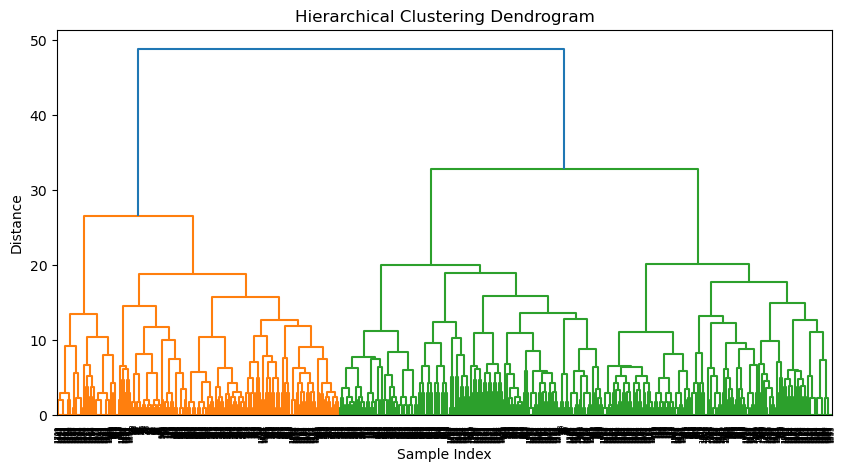

Unique K-means labels: [0 1 2]
Unique Agglomerative labels: [0 1 2]


In [19]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# K-means clustering
kmeans = KMeans(n_clusters=3)
kmeans_labels = kmeans.fit_predict(df)

# Hierarchical clustering
hierarchical = linkage(df, method='complete')
plt.figure(figsize=(10, 5))
dendrogram(hierarchical)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Agglomerative clustering
agglomerative = AgglomerativeClustering(n_clusters=3)
agglomerative_labels = agglomerative.fit_predict(df)

# Print the unique labels
unique_kmeans_labels = np.unique(kmeans_labels)
unique_agglomerative_labels = np.unique(agglomerative_labels)

print("Unique K-means labels:", unique_kmeans_labels)
print("Unique Agglomerative labels:", unique_agglomerative_labels)
